In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
prorogated_labours = pd.read_csv('Rapporti_di_lavoro_prorogati.csv')
prorogated_labours.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,10/01/2020,F,48,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
1,01/03/2013,M,56,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,09/10/2018,M,58,Rifugi di montagna,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIA
3,10/04/2017,M,41,Realizzazione di coperture,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,MAROCCO
4,03/01/2010,M,56,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


In [31]:
prorogated_labours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413617 entries, 0 to 3413616
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 234.4+ MB


In [32]:
prorogated_labours.ETA.describe()

count    3.413617e+06
mean     3.525818e+01
std      1.154969e+01
min      0.000000e+00
25%      2.500000e+01
50%      3.400000e+01
75%      4.400000e+01
max      1.000000e+02
Name: ETA, dtype: float64

In [33]:
prorogated_labours.ETA.value_counts()

24     127987
23     127669
25     127591
22     126249
21     125519
        ...  
93          3
96          3
90          2
95          2
100         1
Name: ETA, Length: 98, dtype: int64

Seems there are some really old people working in italy.

# Data cleaning

### Null inspection

In [34]:
def get_percent_missing(df):
    return df.isnull().sum() * 100 / len(df)

In [35]:
get_percent_missing(prorogated_labours)

DATA                         0.000000
GENERE                       0.000000
ETA                          0.000000
SETTOREECONOMICODETTAGLIO    0.067114
TITOLOSTUDIO                 0.004687
CONTRATTO                    0.000000
MODALITALAVORO               0.000000
PROVINCIAIMPRESA             0.000000
ITALIANO                     0.000000
dtype: float64

As we can see the null values are really a minmal part of the dataset, so we can delete them quite safely wihthout risking to lose information

In [36]:
prorogated_labours.dropna(inplace=True)
get_percent_missing(prorogated_labours)

DATA                         0.0
GENERE                       0.0
ETA                          0.0
SETTOREECONOMICODETTAGLIO    0.0
TITOLOSTUDIO                 0.0
CONTRATTO                    0.0
MODALITALAVORO               0.0
PROVINCIAIMPRESA             0.0
ITALIANO                     0.0
dtype: float64

### Remove outliers:
According to Google, in italy the average age for retirement is ~64 years old. How can a job be prorogated over this age?
On the other hand, the legal age to start a job is 18 years old, so can we cut data under this age ?.

<AxesSubplot:xlabel='ETA'>

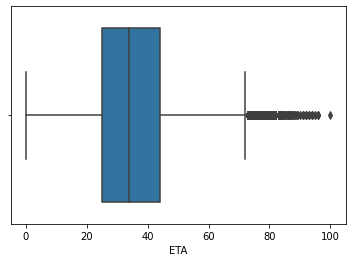

In [37]:
sns.boxplot(x=prorogated_labours.ETA)

Let's inspect also some quantiles

In [38]:
prorogated_labours.ETA.quantile(q=0.99)

64.0

The quantiles seems to broadly respect our guessings

In [39]:
prorogated_labours.ETA.quantile(q=0.1)

21.0

In [40]:
HIGH = prorogated_labours.ETA.quantile(0.99)
LOW = prorogated_labours.ETA.quantile(0.1)

In [41]:
prorogated_labours = prorogated_labours[prorogated_labours['ETA'] < HIGH]
prorogated_labours = prorogated_labours[prorogated_labours['ETA'] > LOW]

<AxesSubplot:xlabel='ETA'>

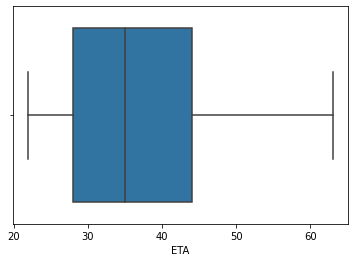

In [42]:
sns.boxplot(x=prorogated_labours.ETA)

Now the box plot seems more reasonable

### Inspect the distribution of data

<AxesSubplot:xlabel='ETA', ylabel='Count'>

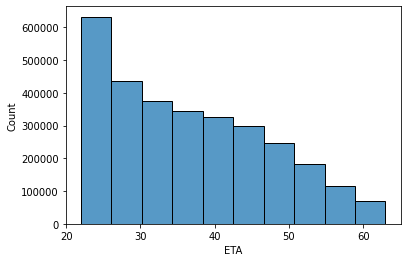

In [43]:
sns.histplot(x=prorogated_labours.ETA, bins=10)

skewed right, meaning that the younger you are, the more proability you have to be prorogated

## Inspect column 'MODALITALAVORO'

In [44]:
prorogated_labours.MODALITALAVORO.nunique()

5

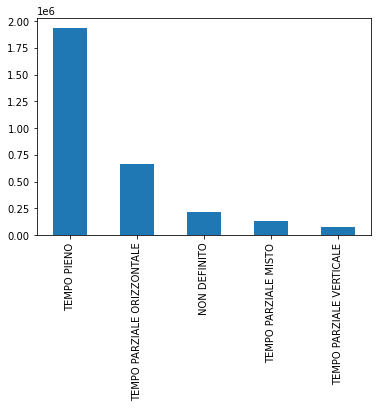

In [45]:
prorogated_labours.MODALITALAVORO.value_counts()
freq_table = prorogated_labours.MODALITALAVORO.value_counts()
xaxis = freq_table.index
value = freq_table.values

ax = freq_table.plot.bar(x=xaxis, y=value)

It seems that people working with full time jobs have their job prorogated with more probability

# Sampling
Should we sample the dataaset ?